In [21]:
import torch
from torchvision.models.detection.ssdlite import ssdlite320_mobilenet_v3_large
from torchvision.models.detection.ssd import ssd300_vgg16
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
import torchvision.transforms as T

import numpy as np
import matplotlib.pyplot as plt

from typing import List

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
car = read_image('car.jpg')
print(type(car), car.shape)

<class 'torch.Tensor'> torch.Size([3, 2139, 3500])


In [17]:
def show(imgs: List[torch.Tensor]):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(20,10))
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))                 # -> cpu -> PILImage
        axs[0, i].imshow(np.asarray(img))                   # -> np.asarray
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [22]:
#model = ssdlite320_mobilenet_v3_large(pretrained=True, progress=False).to(device).eval()
model = ssd300_vgg16(pretrained=True, progress=False).to(device).eval()

/home/curt/.pyenv/versions/3.8.9/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /home/curt/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth


In [23]:
transform = T.ConvertImageDtype(torch.float)

In [24]:
results = model([transform(car.to(device))])

In [25]:
result = results[0]
boxes = result['boxes']
labels = result['labels']
scores = result['scores']
print(boxes.shape)
print(labels.shape)
print(scores.shape)

torch.Size([200, 4])
torch.Size([200])
torch.Size([200])


In [28]:
THRESHOLD = 0.5
filtered_boxes = boxes[scores > THRESHOLD]
filtered_labels = labels[scores > THRESHOLD]
filtered_scores = scores[scores > THRESHOLD]
print(filtered_boxes)

tensor([[2204.9802, 1028.4850, 3142.3853, 1483.9784],
        [ 486.9310, 1078.7395, 1269.2253, 1528.6962],
        [1383.4731, 1030.7709, 2079.3960, 1673.6898],
        [ 376.8374,  830.7198,  955.0934, 1040.6426],
        [1071.1165,  827.9601, 1612.4573, 1072.4457],
        [1935.5074,  828.3365, 2420.1892, 1059.5221],
        [1623.5604,  733.1911, 1877.4590,  858.4603],
        [2520.0256,  827.8423, 3122.6418, 1022.4240]], device='cuda:0',
       grad_fn=<IndexBackward>)


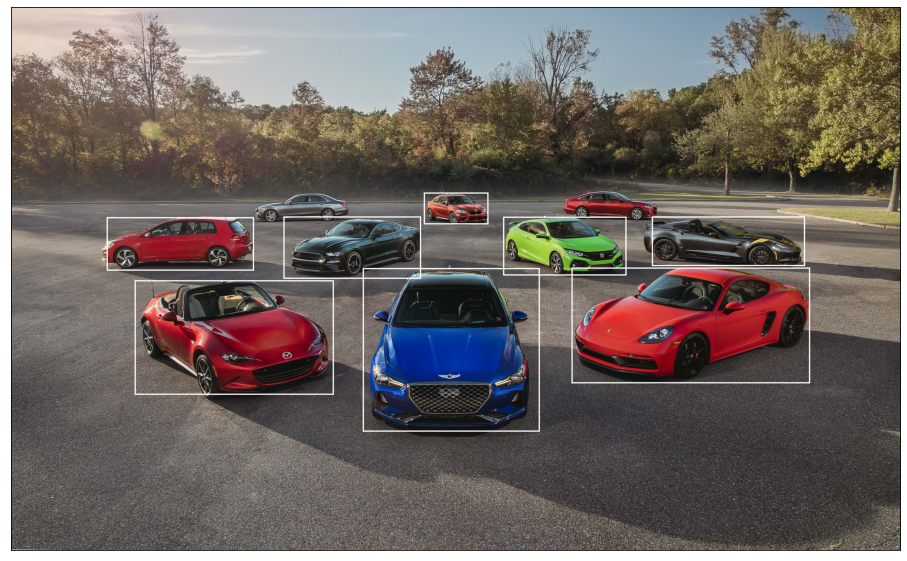

In [29]:
result_image = draw_bounding_boxes(car, filtered_boxes, width=5)
show([result_image])